<a href="https://colab.research.google.com/github/ChrisMath26/Bases_ML/blob/main/Gradiente_descendente/Christian_Trilleras_LogisticRegression_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimización de la regresión logística usando descenso del gradiente

El objetivo en una regresión logística es maximizar la función log likelihood dada por

\begin{equation}
l(\mathbf{w}) = \sum_i (1-y_i)(-\mathbf{x}^T_i \mathbf{w}) - ln(1+exp(-\mathbf{x}^T_i \mathbf{w}))
\end{equation}

Para poder usar el descenso del gradiente debemos transformar la función objetivo en una función de costo, esto se consigue añadiendo un signo negativo .

En este ejercicio vamos a implementar un algoritmo de descenso del gradiente para optimizar los parámetros $\mathbf{w}$ en el siguiente problema:

Una compañía de automóviles le presenta un conjunto de datos con 3 columnas: La edad de un potencial cliente, el salario estimado y la información sobre si compró o no un carro.

Dados la edad y salario de un nuevo cliente ajuste una regresión logística para saber si un nuevo cliente comprará o no el nuevo carro.

Para ello se le pide lo siguiente

1. Calcule el gradiente de la función $-l(\mathbf{w})$
2. Separe el conjunto de datos en entrenamiento y prueba en una proporción 80/20. Implemente un método de descenso del gradiente utilizando solo el conjunto de prueba, realice implementaciones de Batch Gradiente Descent, Mini Batch Gradient Descent y Stochastic Gradient Descent. Para cada implementación haga una gráfica que  muestre cómo varía la función de costo $-l(\mathbf{w})$ a medida que se hacen iteraciones (épocas) del algoritmo
3. Al finzalizar el algoritmo evalúe la predicción sobre el conjunto de prueba considerando que si la probabilidad es $>0.5$ corresponde a la categoría 1 y si la probabilidad es $\leq 0.5$ es de categoría 0.
4. Realice la matriz de confusión que muestre el desempeño de su modelo

1. Calcule el gradiente de la función $-l(\mathbf{w})$

En efecto, sea
\begin{equation}
l(\mathbf{w}) = \sum_i (1-y_i)(-\mathbf{x}^T_i \mathbf{w}) - \ln(1 + \exp(-\mathbf{x}^T_i \mathbf{w}))
\end{equation}
de donde,
\begin{equation}
-l(\mathbf{w}) = \sum_i (1-y_i)(\mathbf{x}^T_i \mathbf{w}) + \ln(1 + \exp(-\mathbf{x}^T_i \mathbf{w}))
\end{equation}
Ahora, vamos a calcular el gradiente, denotado por $\nabla(-l(\mathbf{w}))$:

\begin{equation}
\nabla(-l(\mathbf{w})) = \sum_i \left[ (1 - y_i) \mathbf{x}^T_i - \frac{\exp(-\mathbf{x}^T_i \mathbf{w})}{1 + \exp(-\mathbf{x}^T_i \mathbf{w})} \mathbf{x}^T_i \right]
\end{equation}

Este es el gradiente de la función $-l(\mathbf{w})$ con respecto a los parámetros $\mathbf{w}$. Este gradiente es utilizado en el descenso del gradiente para encontrar los valores óptimos de $\mathbf{w}$ que maximizan la función log-likelihood.

2. Separe el conjunto de datos en entrenamiento y prueba en una proporción 80/20. Implemente un método de descenso del gradiente utilizando solo el conjunto de prueba, realice implementaciones de Batch Gradiente Descent, Mini Batch Gradient Descent y Stochastic Gradient Descent. Para cada implementación haga una gráfica que  muestre cómo varía la función de costo $-l(\mathbf{w})$ a medida que se hacen iteraciones (épocas) del algoritmo

In [ ]:
#librerías inicialmente necesarias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#importar el conjunto de datos
datos=pd.read_csv('Social_Network_Ads.csv')
datos

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
#separar variables dependientes e independientes
X = datos.iloc[:,:-1].values
y= datos.iloc[:,-1].values

In [ ]:
#Separando el conjunto de datos en entrenamiento y prueba en una proporción 80/20
from sklearn.model_selection import train_test_split
train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler #escalonamiento
sc=StandardScaler()
X_train_Sc=sc.fit_transform(X_train) #estandarizar datos de entrenamiento
X_test_Sc=sc.transform(X_test) #estandarizar los datos de prueba

#Batch GD

In [ ]:
#Inicialización de parámetros
w = np.random.randn(3,1) #Inicialización de los pesos del modelo tres parámetros (intercepto y dos características).
eta = 0.001 #Tasa de aprendizaje
epochs = 1000
x = np.hstack((np.ones([len(X_train_Sc),1]),X_train_Sc)) #Añadir una columna de unos a la izquierda de la matriz X_train_Sc. Esto se hace para representar el intercepto en la regresión.
def batch_GD(x,y,y_pred,w,eta):

    dldw0 = 0
    dldw1 = 0   #Inicializar gradientes parciales
    dldw2 = 0

    N = len(x)

    for i in range(0,N):
      #Derivadas parciales por cada componente
        dldw0 -=  (y[i]-1)*(x[i,0]) + y_pred[i]*x[i,0]*np.exp(-x[i,:]@w)
        dldw1 -=  (y[i]-1)*(x[i,1]) + y_pred[i]*x[i,1]*np.exp(-x[i,:]@w)
        dldw2 -=  (y[i]-1)*(x[i,2]) + y_pred[i]*x[i,2]*np.exp(-x[i,:]@w)

    dldw = np.array([dldw0,dldw1,dldw2])

    w = w-eta*dldw


    return w

In [ ]:
Z = x@w
y_pred = 1 / (1 + np.exp(-Z))

Loss = np.zeros(epochs)

for t in range(epochs):
    w = batch_GD(x,y_train,y_pred,w,eta)

    Z = x@w
    y_pred = 1 / (1 + np.exp(-Z))

    aux = np.reshape((1-y_train),(len(y_train),1))
    aux2 = aux*(-Z) - np.log(1+np.exp(-Z))
    Loss[t] = - np.mean(aux2)

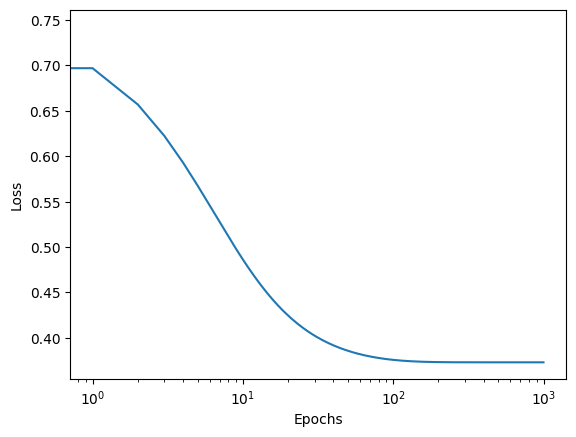

In [ ]:
#gráfico
plt.plot(Loss)
plt.xscale("log")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


3.  evalúe la predicción sobre el conjunto de prueba considerando que si la probabilidad es $>0.5$ corresponde a la categoría 1 y si la probabilidad es $\leq 0.5$ es de categoría 0.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
xTest = np.hstack((np.ones([len(X_test_Sc),1]),X_test_Sc))
Ztest = xTest@w
y_pred_test = 1 / (1 + np.exp(-Ztest))

# Convertir las probabilidades en predicciones
y_pred_test = np.where(y_pred_test > 0.5, 1, 0)
y_pred_test = y_pred_test.reshape(-1)

# Calcular la precisión
accuracy1 = accuracy_score(y_pred_test, y_test)

# Imprimir la precisión
print("Precisión en el conjunto de prueba:", accuracy1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test,y_pred_test)

# Imprimir la matriz de confusión
print("Matriz de confusión:\n", cm)

Precisión en el conjunto de prueba: 0.8875
Matriz de confusión:
 [[50  2]
 [ 7 21]]


4.  matriz de confusión

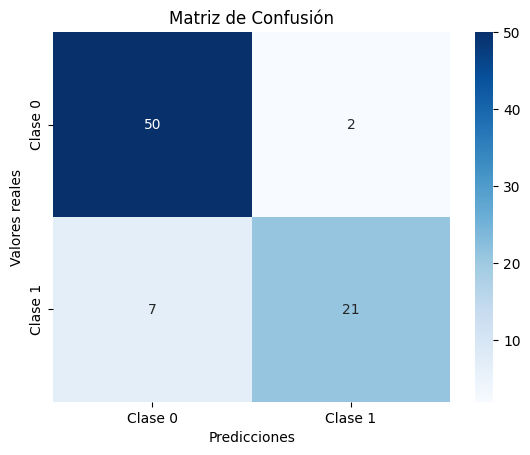

In [ ]:
# Crear un mapa de calor con seaborn
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

#Minibatch GD

In [ ]:
#Inicializacion de parametros
w = np.random.randn(3,1)
eta = 0.005
epochs = 1000

x = np.hstack((np.ones([len(X_train_Sc),1]),X_train_Sc))
batch_size = 50

def Minibatch_GD(x,y,y_pred,w,eta,batch_size):

    dldw0 = 0
    dldw1 = 0
    dldw2 = 0

    N = len(x)
    num_batches = int(np.ceil(len(X) / batch_size)) #Calcula el número total de mini lotes necesarios para cubrir todo el conjunto de entrenamiento

    # Seleccionar aleatoriamente índices para formar un mini lote.
    indices = np.random.randint(0, N, batch_size)
    x_batch = x[indices]
    y_batch = y[indices]

    for i in range(0,num_batches):  #Cálculo de gradientes para cada mini lote
        dldw0 -=  (y_batch[i]-1)*(x_batch[i,0]) + y_pred[i]*x_batch[i,0]*np.exp(-x_batch[i,:]@w)
        dldw1 -=  (y_batch[i]-1)*(x_batch[i,1]) + y_pred[i]*x_batch[i,1]*np.exp(-x_batch[i,:]@w)
        dldw2 -=  (y_batch[i]-1)*(x_batch[i,2]) + y_pred[i]*x_batch[i,2]*np.exp(-x_batch[i,:]@w)

    dldw = np.array([dldw0,dldw1,dldw2])

    w = w-eta*dldw


    return w

In [ ]:
Z = x@w
y_pred = 1 / (1 + np.exp(-Z))

Loss_MB = np.zeros(epochs)

for t in range(epochs):
    w = Minibatch_GD(x,y_train,y_pred,w,eta, batch_size)

    Z = x@w
    y_pred = 1 / (1 + np.exp(-Z))

    aux = np.reshape((1-y_train),(len(y_train),1))
    aux2 = aux*(-Z) - np.log(1+np.exp(-Z))
    Loss_MB[t] = - np.mean(aux2)

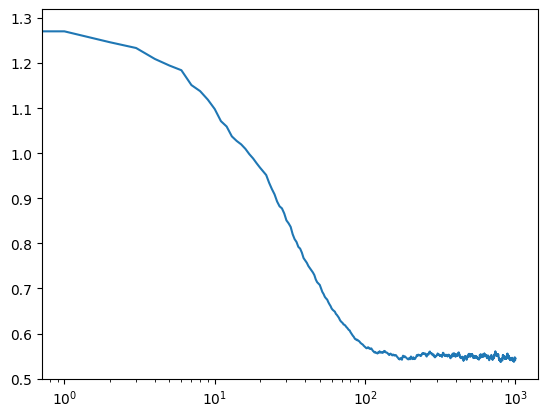

In [ ]:
plt.plot(Loss_MB)
plt.xscale("log")

3. evalúe la predicción sobre el conjunto de prueba considerando que si la probabilidad es $>0.5$ corresponde a la categoría 1 y si la probabilidad es $\leq 0.5$ es de categoría 0.

In [ ]:
xTest = np.hstack((np.ones([len(X_test_Sc),1]),X_test_Sc))
Ztest = xTest@w
y_pred_test = 1 / (1 + np.exp(-Ztest))

# Convertir las probabilidades en predicciones
y_pred_test = np.where(y_pred_test > 0.5, 1, 0)
# y_pred_test = y_pred_test.reshape(-1)

# Calcular la precisión
accuracy_MB = accuracy_score(y_pred_test, y_test)

# Imprimir la precisión
print("Precisión en el conjunto de prueba:", accuracy_MB)

# Calcular la matriz de confusión
cm_MB = confusion_matrix(y_test,y_pred_test)

# Imprimir la matriz de confusión
print("Matriz de confusión:\n", cm_MB)

Precisión en el conjunto de prueba: 0.8875
Matriz de confusión:
 [[46  6]
 [ 3 25]]


4. matriz de confusión

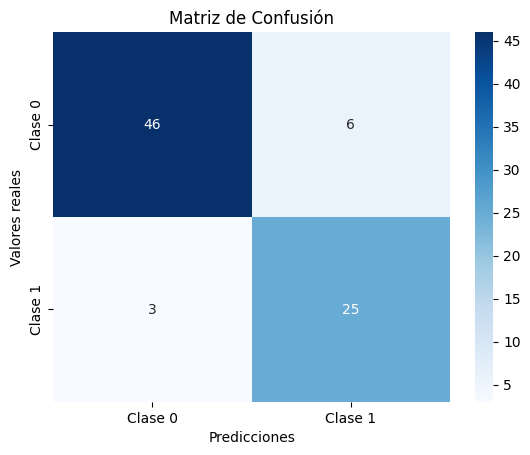

In [ ]:
# Crear un mapa de calor con seaborn
import seaborn as sns
sns.heatmap(cm_MB, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

Stochastic GD


In [ ]:
#Inicializacion de parametros
w = np.random.randn(3,1)
eta = 0.0001
epochs = 1000

x = np.hstack((np.ones([len(X_train_Sc),1]),X_train_Sc))
def stochastic_GD(x, y, y_pred, w, eta):

    N = len(x)

    # Escoger aleatoriamente un indice entre el conjunto de datos
    idx = np.random.randint(0, N)

    # Calcular gradiente para el dato escogido
    dldw = -(y[idx] - 1) * x[idx] + y_pred[idx] * x[idx] * np.exp(-x[idx,:] @ w)
    dldw = dldw.reshape(3,1) #Para concordar con tamaño del w

    # Actualizar parametro
    w -= eta * dldw
    return w

In [ ]:
Z = x@w
y_pred = 1 / (1 + np.exp(-Z))

Loss_ST = np.zeros(epochs)

for t in range(epochs):
    w = stochastic_GD(x,y_train,y_pred,w,eta)

    Z = x@w
    y_pred = 1 / (1 + np.exp(-Z))

    aux = np.reshape((1-y_train),(len(y_train),1))
    aux2 = aux*(-Z) - np.log(1+np.exp(-Z))
    Loss_ST[t] = - np.mean(aux2)

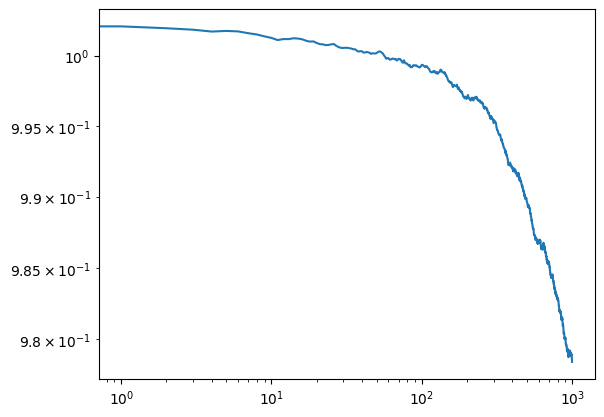

In [ ]:
plt.plot(Loss_ST)
plt.xscale("log")
plt.yscale("log")

3. evalúe la predicción sobre el conjunto de prueba considerando que si la probabilidad es $>0.5$ corresponde a la categoría 1 y si la probabilidad es $\leq 0.5$ es de categoría 0.

In [ ]:
xTest = np.hstack((np.ones([len(X_test_Sc),1]),X_test_Sc))
Ztest = xTest@w
y_pred_test = 1 / (1 + np.exp(-Ztest))

# Convertir las probabilidades en predicciones
y_pred_test = np.where(y_pred_test > 0.5, 1, 0)
# y_pred_test = y_pred_test.reshape(-1)

# Calcular la precisión
accuracy_ST = accuracy_score(y_pred_test, y_test)

# Imprimir la precisión
print("Precisión en el conjunto de prueba:", accuracy_ST)

# Calcular la matriz de confusión
cm_ST = confusion_matrix(y_test,y_pred_test)

# Imprimir la matriz de confusión
print("Matriz de confusión:\n", cm_ST)

Precisión en el conjunto de prueba: 0.25
Matriz de confusión:
 [[12 40]
 [20  8]]


4. matriz de confusión y desempeño del modelo

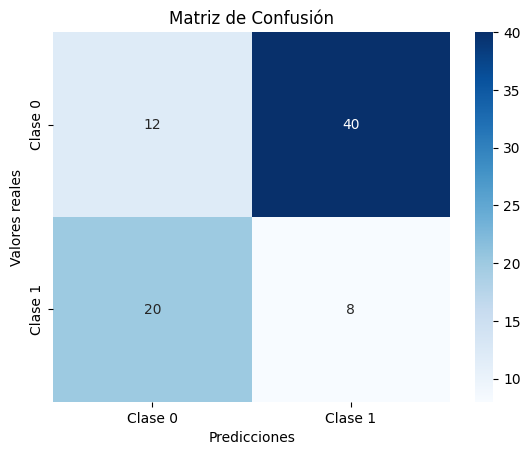

In [ ]:
# Crear un mapa de calor con seaborn
import seaborn as sns
sns.heatmap(cm_ST, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.show()

Teniendo en cuenta la implementación anterior podemos decir que, las diferencias en el comportamiento entre Batch Gradient Descent (descenso de gradiente por lotes), Minibatch Gradient Descent y Stochastic Gradient Descent (SGD) pueden atribuirse a la cantidad de datos utilizados en cada iteración y a la variabilidad en las actualizaciones de peso. SGD, al utilizar un solo ejemplo de entrenamiento a la vez, introduce mayor variabilidad, lo que puede llevar a un comportamiento más oscilante y menos estable.